In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

data_path = '/content/drive/My Drive/Data_Mining/training_set_rel3.tsv'

df = pd.read_csv(data_path, delimiter='\t', encoding='ISO-8859-1')

print(df.head())


   essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
0               4               4             NaN              8   
1               5               4             NaN              9   
2               4               3             NaN              7   
3               5               5             NaN             10   
4               4               4             NaN              8   

   rater1_domain2  rater2_domain2  domain2_score  ...  rater2_trait3  \
0             NaN             NaN            NaN  ...   

In [ ]:
list_1 = []
list_2 = []
list_3 = []
list_4 = []
list_5 = []
list_6 = []
list_7 = []
list_8 = []
list_9 = []
list_10 = []

for i, j in zip(range(len(df)), df["essay"]):
    if df["domain1_score"][i] == 1:
        list_1.append(j)
    elif df["domain1_score"][i] == 2:
        list_2.append(j)
    elif df["domain1_score"][i] == 3:
        list_3.append(j)
    elif df["domain1_score"][i] == 4:
        list_4.append(j)
    elif df["domain1_score"][i] == 5:
        list_5.append(j)
    elif df["domain1_score"][i] == 6:
        list_6.append(j)
    elif df["domain1_score"][i] == 7:
        list_7.append(j)
    elif df["domain1_score"][i] == 8:
        list_8.append(j)
    elif df["domain1_score"][i] == 9:
        list_9.append(j)
    elif df["domain1_score"][i] == 10:
        list_10.append(j)

import itertools
data = list(itertools.chain(list_1, list_2, list_3, list_4, list_5, list_6, list_7, list_8, list_9, list_10))

print(len(data))


10323


In [ ]:
def gen_num(num, length):
    return [num] * length

score_1 = gen_num(1, len(list_1))
score_2 = gen_num(2, len(list_2))
score_3 = gen_num(3, len(list_3))
score_4 = gen_num(4, len(list_4))
score_5 = gen_num(5, len(list_5))
score_6 = gen_num(6, len(list_6))
score_7 = gen_num(7, len(list_7))
score_8 = gen_num(8, len(list_8))
score_9 = gen_num(9, len(list_9))
score_10 = gen_num(10, len(list_10))

score = list(itertools.chain(score_1, score_2, score_3, score_4, score_5, score_6, score_7, score_8, score_9, score_10))
print(len(score))


10323


In [ ]:
data_dict = {'essay': data, 'score': score}

df = pd.DataFrame(data_dict)

print(df.head())


                                               essay  score
0  Write a persuasive essay to a newspaper reflec...      1
1  If the people that are publishing and writing ...      1
2  I do think that there should be a censorship i...      1
3  I belive that they need to keep every thing an...      1
4  Hi my name is @CAPS1 @CAPS2 @PERSON1 and I'm h...      1


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['essay'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

print(corpus[:5])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['write persuasive essay newspaper reflecting view censorship library believe certain removed think yes think person chager book music movie magazine ect agure think need please think thank please need know failure test need graduate please child allow home please yes need prafece person please need write assgiment mean best teach ever ever facebook password person num need myspace thingh different time please know need know really need e mail address email e mail please work', 'people publishing writing article magazine yes feel offensive cap thing inside magazine book people going always find something rumor start big fight cap thing people called cap find eazy way get something started like buy magazine take look inside first see cap interested buying specific certain book magazine like thing see inside cap cap buy cap cap cap cap immediately removed news stand street location location location location location location location location location location organization organization 

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
padded_sequences = pad_sequences(sequences, maxlen=500)
print(padded_sequences.shape)

(10323, 500)


In [ ]:
import numpy as np
from gensim.models import Word2Vec

def essay_to_wordlist(essay_v, remove_stopwords):
    essay_v = re.sub("[^a-zA-Z]", " ", essay_v)
    words = essay_v.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return words

def essay_to_sentences(essay_v, remove_stopwords):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(essay_v.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(essay_to_wordlist(raw_sentence, remove_stopwords))
    return sentences

def make_feature_vec(words, model, num_features):
    feature_vec = np.zeros((num_features,), dtype="float32")
    num_words = 0.
    index2word_set = set(model.wv.index_to_key)
    for word in words:
        if word in index2word_set:
            num_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if num_words > 0:
        feature_vec = np.divide(feature_vec, num_words)
    return feature_vec

def get_avg_feature_vecs(essays, model, num_features):
    counter = 0
    essay_feature_vecs = np.zeros((len(essays), num_features), dtype="float32")
    for essay in essays:
        essay_feature_vecs[counter] = make_feature_vec(essay, model, num_features)
        counter = counter + 1
    return essay_feature_vecs

sentences = []
for essay in df['essay']:
    sentences += essay_to_sentences(essay, remove_stopwords=True)

num_features = 300
min_word_count = 40
num_workers = 4
context = 10
downsampling = 1e-3

print("Training Word2Vec model...")
word2vec_model = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count, window=context, sample=downsampling)
word2vec_model.init_sims(replace=True)
word2vec_model.wv.save_word2vec_format('/content/drive/My Drive/Data_Mining/word2vec_model.bin', binary=True)

clean_essays = []
for essay in df['essay']:
    clean_essays.append(essay_to_wordlist(essay, remove_stopwords=True))
essay_feature_vecs = get_avg_feature_vecs(clean_essays, word2vec_model, num_features)

print(essay_feature_vecs.shape)


Training Word2Vec model...


<ipython-input-11-cd927b89294b>:55: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  word2vec_model.init_sims(replace=True)


(10323, 300)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(essay_feature_vecs, df['score'], test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


(7226, 300) (1548, 300) (1549, 300)
(7226,) (1548,) (1549,)


In [ ]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print("Name:", gpu.name, "  Type:", gpu.device_type)
else:
    print("No GPU available")


Name: /physical_device:GPU:0   Type: GPU


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

def get_model():
    model = Sequential()
    model.add(LSTM(300, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 300], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy', 'mae'])
    model.summary()

    return model

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lstm_model = get_model()
history = lstm_model.fit(X_train_reshaped, y_train, epochs=300, batch_size=64, validation_data=(X_val_reshaped, y_val))
print(history.history)


Num GPUs Available:  1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 300)            721200    
                                                                 
 lstm_1 (LSTM)               (None, 64)                93440     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 814705 (3.11 MB)
Trainable params: 814705 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
113/113 [==============================] - 10s 18ms/step - loss: 5.9613 - accuracy: 0.1420 - mae: 1.7215 - val_loss: 1.9823 - val_accuracy: 0

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, cohen_kappa_score
import numpy as np

y_pred = lstm_model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
y_pred_rounded = np.round(y_pred).astype(int)
kappa = cohen_kappa_score(y_test, y_pred_rounded, weights='quadratic')

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Cohen\'s Kappa Score: {kappa}')

49/49 [==============================] - 1s 5ms/step
Mean Squared Error (MSE): 1.470215027215402
Root Mean Squared Error (RMSE): 1.212524237784714
Mean Absolute Error (MAE): 0.9136659203228295
Cohen's Kappa Score: 0.838970427876716


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

def get_model():
    model = Sequential()
    model.add(LSTM(300, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 300], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy', 'mae'])
    model.summary()

    return model

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lstm_model = get_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/Data_Mining/best_lstm_model.h5', save_best_only=True, monitor='val_loss')

history = lstm_model.fit(X_train_reshaped, y_train, epochs=400, batch_size=64, validation_data=(X_val_reshaped, y_val),
                         callbacks=[early_stopping, model_checkpoint])
print(history.history)


Num GPUs Available:  1


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 300)            721200    
                                                                 
 lstm_3 (LSTM)               (None, 64)                93440     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 814705 (3.11 MB)
Trainable params: 814705 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/400
113/113 [==============================] - 20s 56ms/step - loss: 5.6540 - accuracy: 0.1428 - mae: 1.6874 - val_loss: 1.9418 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


113/113 [==============================] - 4s 32ms/step - loss: 2.2190 - accuracy: 0.1578 - mae: 1.1353 - val_loss: 1.6777 - val_accuracy: 0.1705 - val_mae: 0.9684
Epoch 3/400
113/113 [==============================] - 2s 19ms/step - loss: 2.0482 - accuracy: 0.1575 - mae: 1.0933 - val_loss: 1.5982 - val_accuracy: 0.1718 - val_mae: 0.9465
Epoch 4/400
113/113 [==============================] - 2s 14ms/step - loss: 2.0203 - accuracy: 0.1593 - mae: 1.0748 - val_loss: 1.5522 - val_accuracy: 0.1725 - val_mae: 0.9311
Epoch 5/400
113/113 [==============================] - 2s 14ms/step - loss: 1.9602 - accuracy: 0.1601 - mae: 1.0597 - val_loss: 1.5131 - val_accuracy: 0.1738 - val_mae: 0.9156
Epoch 6/400
113/113 [==============================] - 3s 25ms/step - loss: 1.8929 - accuracy: 0.1612 - mae: 1.0380 - val_loss: 1.4704 - val_accuracy: 0.1738 - val_mae: 0.8928
Epoch 7/400
113/113 [==============================] - 3s 23ms/step - loss: 1.8933 - accuracy: 0.1621 - mae: 1.0351 - val_loss: 1.46

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, cohen_kappa_score
import numpy as np

best_model = tf.keras.models.load_model('/content/drive/My Drive/Data_Mining/best_lstm_model.h5')

y_pred = best_model.predict(X_test_reshaped)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
y_pred_rounded = np.round(y_pred).astype(int)
kappa = cohen_kappa_score(y_test, y_pred_rounded, weights='quadratic')

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Cohen\'s Kappa Score: {kappa}')

49/49 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.7040676592368879
Root Mean Squared Error (RMSE): 0.8390873966619257
Mean Absolute Error (MAE): 0.65112275335387
Cohen's Kappa Score: 0.926278079235937


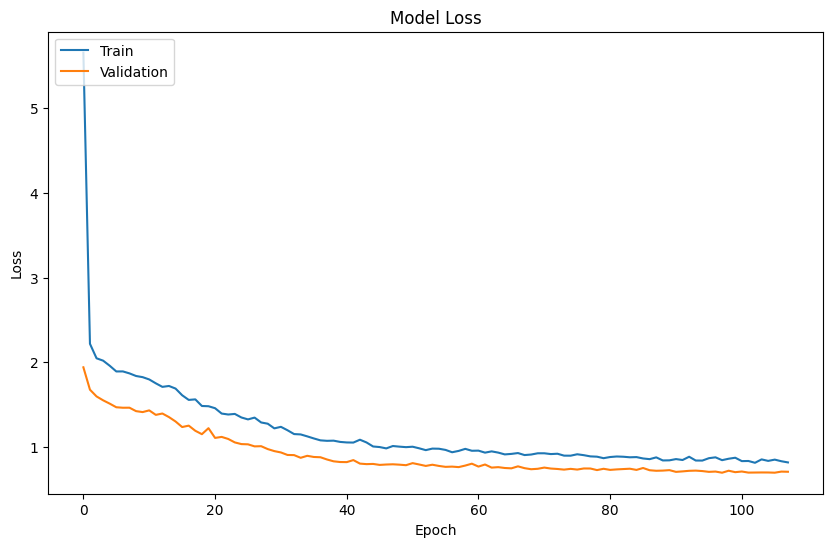

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

def model_builder(hp):
    model = Sequential()

    hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
    model.add(LSTM(units=hp_units1, dropout=hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1),
                   recurrent_dropout=hp.Float('recurrent_dropout1', min_value=0.2, max_value=0.5, step=0.1),
                   input_shape=[1, 300], return_sequences=True))

    hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
    model.add(LSTM(units=hp_units2, dropout=hp.Float('dropout2', min_value=0.2, max_value=0.5, step=0.1),
                   recurrent_dropout=hp.Float('recurrent_dropout2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dropout(hp.Float('dropout3', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='relu'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
                  loss='mean_squared_error',
                  metrics=['accuracy', 'mae'])

    return model


In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=30,
                     factor=3,
                     directory='keras_tuner',
                     project_name='lstm_tuning')


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
tuner.search(X_train_reshaped, y_train, epochs=50, validation_data=(X_val_reshaped, y_val), callbacks=[stop_early])

Trial 73 Complete [00h 01m 30s]
val_loss: 0.6488614082336426

Best val_loss So Far: 0.6301021575927734
Total elapsed time: 00h 29m 39s

Search: Running Trial #74

Value             |Best Value So Far |Hyperparameter
320               |224               |units1
0.2               |0.3               |dropout1
0.3               |0.4               |recurrent_dropout1
352               |512               |units2
0.3               |0.3               |dropout2
0.4               |0.4               |recurrent_dropout2
0.2               |0.3               |dropout3
0.01              |0.01              |learning_rate
30                |30                |tuner/epochs
10                |10                |tuner/initial_epoch
2                 |3                 |tuner/bracket
2                 |3                 |tuner/round
0071              |0046              |tuner/trial_id



Epoch 11/30
226/226 [==============================] - 10s 23ms/step - loss: 0.7805 - accuracy: 0.1627 - mae: 0.6753 - val_loss: 0.7504 - val_accuracy: 0.1757 - val_mae: 0.6387
Epoch 12/30
226/226 [==============================] - 3s 13ms/step - loss: 0.7579 - accuracy: 0.1627 - mae: 0.6653 - val_loss: 0.7868 - val_accuracy: 0.1757 - val_mae: 0.6438
Epoch 13/30
226/226 [==============================] - 3s 14ms/step - loss: 0.7436 - accuracy: 0.1630 - mae: 0.6613 - val_loss: 0.7960 - val_accuracy: 0.1757 - val_mae: 0.6733
Epoch 14/30
225/226 [============================>.] - ETA: 0s - loss: 0.7483 - accuracy: 0.1631 - mae: 0.6603

KeyboardInterrupt: 

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first LSTM layer is {best_hps.get('units1')} with a dropout rate of {best_hps.get('dropout1')} and recurrent dropout rate of {best_hps.get('recurrent_dropout1')}.
The optimal number of units in the second LSTM layer is {best_hps.get('units2')} with a dropout rate of {best_hps.get('dropout2')} and recurrent dropout rate of {best_hps.get('recurrent_dropout2')}.
The optimal dropout rate for the final layer is {best_hps.get('dropout3')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(X_train_reshaped, y_train, epochs=400, batch_size=64, validation_data=(X_val_reshaped, y_val),
                         callbacks=[early_stopping, model_checkpoint])
print(history.history)



The optimal number of units in the first LSTM layer is 224 with a dropout rate of 0.30000000000000004 and recurrent dropout rate of 0.4.
The optimal number of units in the second LSTM layer is 512 with a dropout rate of 0.30000000000000004 and recurrent dropout rate of 0.4.
The optimal dropout rate for the final layer is 0.30000000000000004.
The optimal learning rate for the optimizer is 0.01.

Epoch 1/400
113/113 [==============================] - 16s 40ms/step - loss: 3.0293 - accuracy: 0.1561 - mae: 1.2566 - val_loss: 2.1064 - val_accuracy: 0.1757 - val_mae: 1.0980
Epoch 2/400
113/113 [==============================] - 4s 33ms/step - loss: 1.5772 - accuracy: 0.1621 - mae: 0.9386 - val_loss: 1.2766 - val_accuracy: 0.1757 - val_mae: 0.8538
Epoch 3/400
113/113 [==============================] - 4s 39ms/step - loss: 1.2280 - accuracy: 0.1621 - mae: 0.8347 - val_loss: 0.8996 - val_accuracy: 0.1757 - val_mae: 0.6920
Epoch 4/400
113/113 [==============================] - 5s 41ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


113/113 [==============================] - 5s 44ms/step - loss: 0.7970 - accuracy: 0.1623 - mae: 0.6852 - val_loss: 0.6744 - val_accuracy: 0.1757 - val_mae: 0.6233
Epoch 16/400
113/113 [==============================] - 4s 35ms/step - loss: 0.8037 - accuracy: 0.1623 - mae: 0.6856 - val_loss: 0.7012 - val_accuracy: 0.1757 - val_mae: 0.6343
Epoch 17/400
113/113 [==============================] - 3s 27ms/step - loss: 0.7858 - accuracy: 0.1632 - mae: 0.6770 - val_loss: 0.8462 - val_accuracy: 0.1757 - val_mae: 0.6828
Epoch 18/400
113/113 [==============================] - 2s 14ms/step - loss: 0.7806 - accuracy: 0.1627 - mae: 0.6757 - val_loss: 0.7145 - val_accuracy: 0.1757 - val_mae: 0.6248
Epoch 19/400
113/113 [==============================] - 2s 13ms/step - loss: 0.7606 - accuracy: 0.1627 - mae: 0.6651 - val_loss: 0.6928 - val_accuracy: 0.1757 - val_mae: 0.6246
Epoch 20/400
113/113 [==============================] - 2s 15ms/step - loss: 0.7347 - accuracy: 0.1627 - mae: 0.6596 - val_loss:

In [ ]:
best_model.save('/content/drive/My Drive/Data_Mining/best_lstm_model_tuned.h5')
best_model = tf.keras.models.load_model('/content/drive/My Drive/Data_Mining/best_lstm_model_tuned.h5')

y_pred = best_model.predict(X_test_reshaped)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
y_pred_rounded = np.round(y_pred).astype(int)
kappa = cohen_kappa_score(y_test, y_pred_rounded, weights='quadratic')

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Cohen\'s Kappa Score: {kappa}')

49/49 [==============================] - 1s 3ms/step
Mean Squared Error (MSE): 0.6659407586803745
Root Mean Squared Error (RMSE): 0.8160519338132681
Mean Absolute Error (MAE): 0.6112634595399368
Cohen's Kappa Score: 0.935012338626646


In [ ]:
y_train_pred = best_model.predict(X_train_reshaped)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
y_train_pred_rounded = np.round(y_train_pred).astype(int)
train_kappa = cohen_kappa_score(y_train, y_train_pred_rounded, weights='quadratic')

y_val_pred = best_model.predict(X_val_reshaped)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
y_val_pred_rounded = np.round(y_val_pred).astype(int)
val_kappa = cohen_kappa_score(y_val, y_val_pred_rounded, weights='quadratic')

y_test_pred = best_model.predict(X_test_reshaped)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
y_test_pred_rounded = np.round(y_test_pred).astype(int)
test_kappa = cohen_kappa_score(y_test, y_test_pred_rounded, weights='quadratic')

print("Training set evaluation:")
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Root Mean Squared Error (RMSE): {train_rmse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Cohen\'s Kappa Score: {train_kappa}')

print("\nValidation set evaluation:")
print(f'Mean Squared Error (MSE): {val_mse}')
print(f'Root Mean Squared Error (RMSE): {val_rmse}')
print(f'Mean Absolute Error (MAE): {val_mae}')
print(f'Cohen\'s Kappa Score: {val_kappa}')

print("\nTest set evaluation:")
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Cohen\'s Kappa Score: {test_kappa}')


49/49 [==============================] - 0s 4ms/step
Training set evaluation:
Mean Squared Error (MSE): 0.4988195065406289
Root Mean Squared Error (RMSE): 0.7062715529742288
Mean Absolute Error (MAE): 0.5529350059005385
Cohen's Kappa Score: 0.9519865908806446

Validation set evaluation:
Mean Squared Error (MSE): 0.6125657028865333
Root Mean Squared Error (RMSE): 0.7826657670337532
Mean Absolute Error (MAE): 0.5847323458324107
Cohen's Kappa Score: 0.9406721036570814

Test set evaluation:
Mean Squared Error (MSE): 0.6659407586803745
Root Mean Squared Error (RMSE): 0.8160519338132681
Mean Absolute Error (MAE): 0.6112634595399368
Cohen's Kappa Score: 0.935012338626646


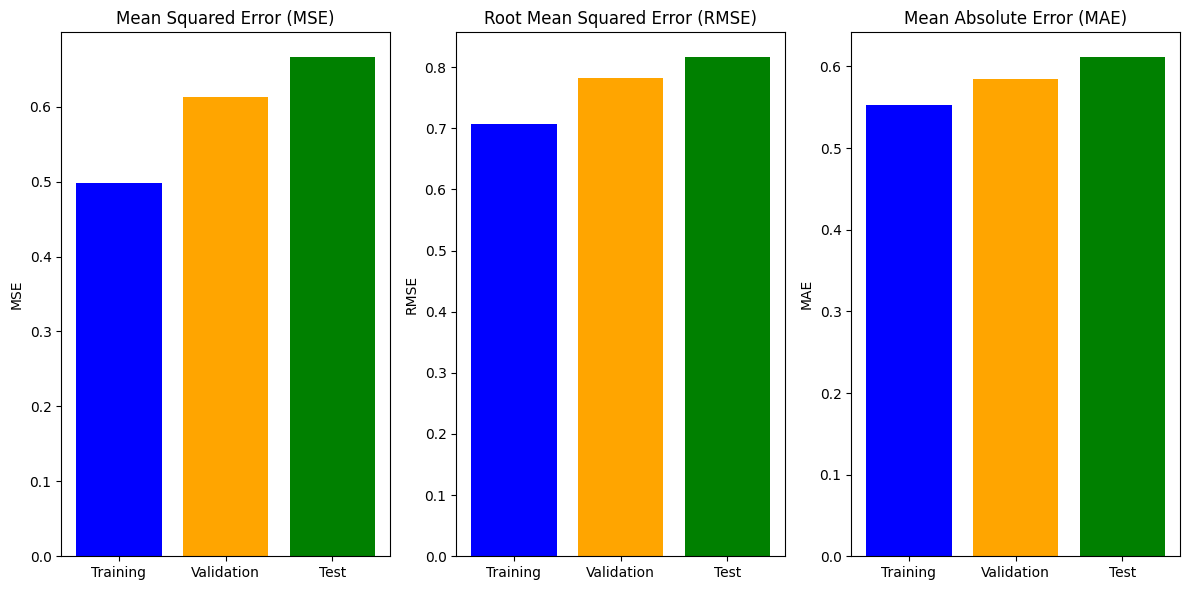

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = {
    'MSE': [train_mse, val_mse, test_mse],
    'RMSE': [train_rmse, val_rmse, test_rmse],
    'MAE': [train_mae, val_mae, test_mae]
}

labels = ['Training', 'Validation', 'Test']

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(labels, metrics['MSE'], color=['blue', 'orange', 'green'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.bar(labels, metrics['RMSE'], color=['blue', 'orange', 'green'])
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')

plt.subplot(1, 3, 3)
plt.bar(labels, metrics['MAE'], color=['blue', 'orange', 'green'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()


In [ ]:
from keras.layers import Bidirectional

def get_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(300, dropout=0.4, recurrent_dropout=0.4, return_sequences=True), input_shape=[1, 300]))
    model.add(Bidirectional(LSTM(64, recurrent_dropout=0.4)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy', 'mae'])
    model.summary()

    return model

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/Data_Mining/best_bilstm_model.h5', save_best_only=True, monitor='val_loss')

bilstm_model = get_bilstm_model()
history = bilstm_model.fit(X_train_reshaped, y_train, epochs=400, batch_size=64, validation_data=(X_val_reshaped, y_val),
                         callbacks=[early_stopping, model_checkpoint])

print(history.history)
best_bilstm_model = tf.keras.models.load_model('/content/drive/My Drive/Data_Mining/best_bilstm_model.h5')



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 1, 600)            1442400   
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               340480    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1783009 (6.80 MB)
Trainable params: 1783009 (6.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/400
113/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


113/113 [==============================] - 3s 24ms/step - loss: 1.9654 - accuracy: 0.1560 - mae: 1.0710 - val_loss: 1.6258 - val_accuracy: 0.1673 - val_mae: 0.9513
Epoch 3/400
113/113 [==============================] - 2s 20ms/step - loss: 1.8640 - accuracy: 0.1571 - mae: 1.0370 - val_loss: 1.6637 - val_accuracy: 0.1667 - val_mae: 0.9593
Epoch 4/400
113/113 [==============================] - 3s 22ms/step - loss: 1.8232 - accuracy: 0.1590 - mae: 1.0228 - val_loss: 1.5902 - val_accuracy: 0.1673 - val_mae: 0.9536
Epoch 5/400
113/113 [==============================] - 2s 21ms/step - loss: 1.7966 - accuracy: 0.1598 - mae: 1.0153 - val_loss: 1.4736 - val_accuracy: 0.1699 - val_mae: 0.8963
Epoch 6/400
113/113 [==============================] - 5s 42ms/step - loss: 1.7364 - accuracy: 0.1598 - mae: 0.9971 - val_loss: 1.4541 - val_accuracy: 0.1725 - val_mae: 0.8905
Epoch 7/400
113/113 [==============================] - 2s 21ms/step - loss: 1.6869 - accuracy: 0.1609 - mae: 0.9855 - val_loss: 1.42

In [ ]:
y_train_pred = best_bilstm_model.predict(X_train_reshaped)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_kappa = cohen_kappa_score(y_train, np.round(y_train_pred).astype(int), weights='quadratic')

y_val_pred = best_bilstm_model.predict(X_val_reshaped)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_kappa = cohen_kappa_score(y_val, np.round(y_val_pred).astype(int), weights='quadratic')

y_test_pred = best_bilstm_model.predict(X_test_reshaped)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_kappa = cohen_kappa_score(y_test, np.round(y_test_pred).astype(int), weights='quadratic')

print("Training set evaluation:")
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Root Mean Squared Error (RMSE): {train_rmse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Cohen\'s Kappa Score: {train_kappa}')

print("\nValidation set evaluation:")
print(f'Mean Squared Error (MSE): {val_mse}')
print(f'Root Mean Squared Error (RMSE): {val_rmse}')
print(f'Mean Absolute Error (MAE): {val_mae}')
print(f'Cohen\'s Kappa Score: {val_kappa}')

print("\nTest set evaluation:")
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Cohen\'s Kappa Score: {test_kappa}')


49/49 [==============================] - 0s 4ms/step
Training set evaluation:
Mean Squared Error (MSE): 0.5952056939090183
Root Mean Squared Error (RMSE): 0.7714957510634899
Mean Absolute Error (MAE): 0.6038440877699041
Cohen's Kappa Score: 0.9416499183045057

Validation set evaluation:
Mean Squared Error (MSE): 0.6689318650135606
Root Mean Squared Error (RMSE): 0.8178825496448501
Mean Absolute Error (MAE): 0.6190094601276309
Cohen's Kappa Score: 0.9338377381783194

Test set evaluation:
Mean Squared Error (MSE): 0.6819478739812399
Root Mean Squared Error (RMSE): 0.8258013526152884
Mean Absolute Error (MAE): 0.6376369748291005
Cohen's Kappa Score: 0.9301361246869332


In [ ]:
import keras_tuner as kt
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error, mean_absolute_error, cohen_kappa_score
import matplotlib.pyplot as plt

def build_bilstm_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                                 dropout=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1),
                                 recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.1, max_value=0.5, step=0.1),
                                 return_sequences=True), input_shape=[1, 300]))
    model.add(Bidirectional(LSTM(units=hp.Int('units2', min_value=32, max_value=512, step=32),
                                 recurrent_dropout=hp.Float('recurrent_dropout2', min_value=0.1, max_value=0.5, step=0.1))))
    model.add(Dropout(hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error',
                  optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
                  metrics=['accuracy', 'mae'])
    return model

tuner = kt.RandomSearch(
    build_bilstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='bilstm_tuning',
    project_name='essay_scoring'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/Data_Mining/best_bilstm_model_tuned.h5', save_best_only=True, monitor='val_loss')

tuner.search(X_train_reshaped, y_train, epochs=100, validation_data=(X_val_reshaped, y_val),
             callbacks=[early_stopping, model_checkpoint])

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Trial 10 Complete [00h 11m 09s]
val_loss: 0.6664972007274628

Best val_loss So Far: 0.6081187725067139
Total elapsed time: 03h 09m 10s


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 1, 896)            2684416   
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 1024)              5771264   
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 8456705 (32.26 MB)
Trainable params: 8456705 (32.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_train_pred = best_model.predict(X_train_reshaped)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_kappa = cohen_kappa_score(y_train, np.round(y_train_pred).astype(int), weights='quadratic')

y_val_pred = best_model.predict(X_val_reshaped)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_kappa = cohen_kappa_score(y_val, np.round(y_val_pred).astype(int), weights='quadratic')

y_test_pred = best_model.predict(X_test_reshaped)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_kappa = cohen_kappa_score(y_test, np.round(y_test_pred).astype(int), weights='quadratic')

print("Training set evaluation:")
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Root Mean Squared Error (RMSE): {train_rmse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Cohen\'s Kappa Score: {train_kappa}')

print("\nValidation set evaluation:")
print(f'Mean Squared Error (MSE): {val_mse}')
print(f'Root Mean Squared Error (RMSE): {val_rmse}')
print(f'Mean Absolute Error (MAE): {val_mae}')
print(f'Cohen\'s Kappa Score: {val_kappa}')

print("\nTest set evaluation:")
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Cohen\'s Kappa Score: {test_kappa}')


49/49 [==============================] - 0s 4ms/step
Training set evaluation:
Mean Squared Error (MSE): 0.48677640392377164
Root Mean Squared Error (RMSE): 0.6976936318498053
Mean Absolute Error (MAE): 0.5503632503964054
Cohen's Kappa Score: 0.9508295734555863

Validation set evaluation:
Mean Squared Error (MSE): 0.6064801758088887
Root Mean Squared Error (RMSE): 0.7787683710891761
Mean Absolute Error (MAE): 0.5853112609696018
Cohen's Kappa Score: 0.9385753987672608

Test set evaluation:
Mean Squared Error (MSE): 0.6264934174941383
Root Mean Squared Error (RMSE): 0.7915133716458228
Mean Absolute Error (MAE): 0.6013181819078459
Cohen's Kappa Score: 0.9350003926764668


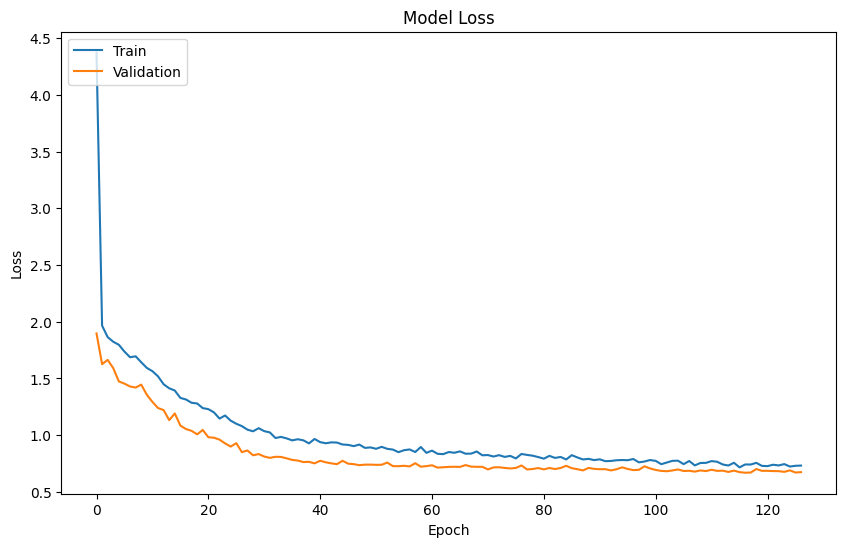

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

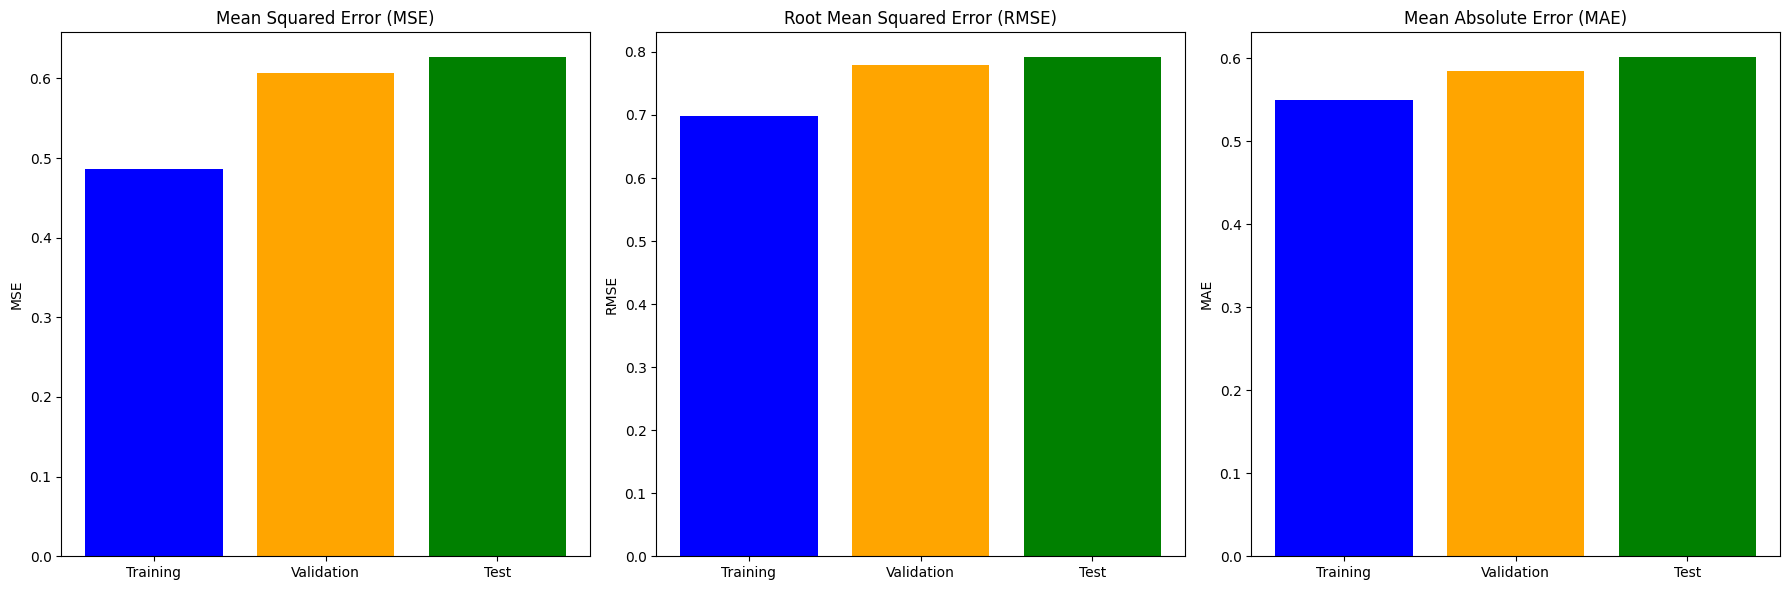

In [ ]:
metrics = {
    'MSE': [train_mse, val_mse, test_mse],
    'RMSE': [train_rmse, val_rmse, test_rmse],
    'MAE': [train_mae, val_mae, test_mae]
}
labels = ['Training', 'Validation', 'Test']

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.bar(labels, metrics['MSE'], color=['blue', 'orange', 'green'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.bar(labels, metrics['RMSE'], color=['blue', 'orange', 'green'])
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')

plt.subplot(1, 3, 3)
plt.bar(labels, metrics['MAE'], color=['blue', 'orange', 'green'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()